# Problem Statement: Music Generation Using Different types of RNN

# Objectives
* To Understand how RNN works.
* Learn about LSTM, Bidirectional-LSTM, GRU and CNN + LSTM

## Running this notebook on your own Cloab
##### Go to this link: [link text](https://www.kaggle.com/datasets/soumikrakshit/classical-music-midi)

* download the dataset

--------------------------------
In colab

* create a folder **"MIDI_data**" inside content
and upload all data for **albeniz**

* also create a folder "**prediction**" under same parent folder

## Coding Implementation

In [ ]:
#load all the libraries
import os
import numpy as np
import random
from music21 import *
import glob
from tqdm import tqdm

In [ ]:
#@title
#Loading the list of chopin's midi files as stream
filepath = "/content/MIDI_data/"

print("Loading Music File:",filepath)
print("-"*80)
#Getting midi files
all_midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = filepath+i
        midi = converter.parse(tr)
        all_midis.append(midi)

print("Completed...")

Loading Music File: /content/MIDI_data/
--------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 2001 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Completed...


In [ ]:
#@title
#Helping function
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))

Total notes in all the Chopin midis in the dataset: 17545


In [ ]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['B-3', '3.7', '3', 'A3', 'B-3', 'G3', '3.7', 'G3', '10', 'B-3', 'A3', '2.8', '5', 'B-3', 'C4', 'C#4', 'D4', 'G#4', '10', 'B-3', '3.7', 'B-3', '3', 'A3', 'B-3', 'G3', '3.7', 'G3', '10', 'B-3', '2.8', 'A3', '5', 'B-3', 'C4', 'C#4', 'D4', 'G#4', '10', 'B-3', '3', 'E-3', '5', 'G4', 'G5', 'G4', '10', 'E-4', '10', 'B-3']


In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in Corpus for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

20


(array([6., 6., 3., 0., 2., 0., 1., 0., 1., 1.]),
 array([ 912. , 1464.8, 2017.6, 2570.4, 3123.2, 3676. , 4228.8, 4781.6,
        5334.4, 5887.2, 6440. ]),
 <BarContainer object of 10 artists>)

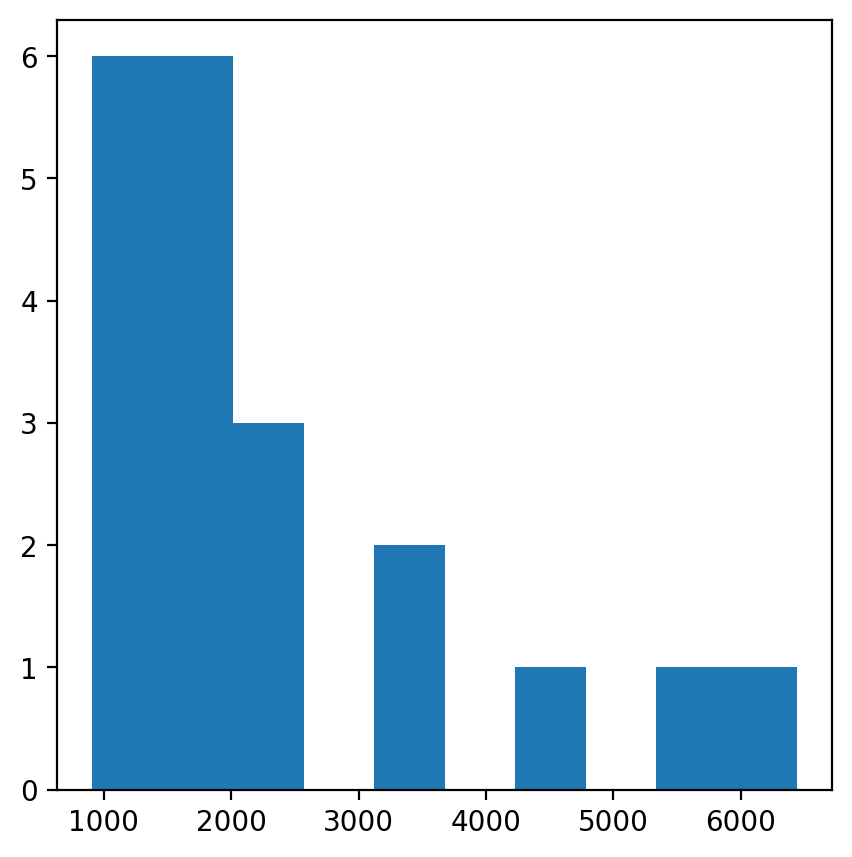

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
#Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 248


In [ ]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())

#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)

print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 70.74596774193549
Most frequent note in Corpus appeared: 1105 times
Least frequent note in Corpus appeared: 1 time


In [ ]:
# Storing all the unique characters present in my corpus to bult a mapping dic.
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 17545
Number of unique characters: 248


In [ ]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])


L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 17505


In [ ]:
#Importing Libraries
import IPython
from IPython.display import Image, Audio

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax


### Dividing into training and test set

In [ ]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tf.keras.utils.to_categorical(targets)

In [ ]:
X[1].T

array([[0.34677419, 0.30645161, 0.72580645, 0.75      , 0.98387097,
        0.34677419, 0.98387097, 0.125     , 0.75      , 0.72580645,
        0.30241935, 0.42741935, 0.75      , 0.82258065, 0.7983871 ,
        0.84677419, 0.96370968, 0.125     , 0.75      , 0.34677419,
        0.75      , 0.30645161, 0.72580645, 0.75      , 0.98387097,
        0.34677419, 0.98387097, 0.125     , 0.75      , 0.30241935,
        0.72580645, 0.42741935, 0.75      , 0.82258065, 0.7983871 ,
        0.84677419, 0.96370968, 0.125     , 0.75      , 0.30645161]])

In [ ]:
y[1].T

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
X.shape, y.shape

((17505, 40, 1), (17505, 248))

In [ ]:
#Taking out a subset of data to be used as seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

**Here we are implementing following models**

1. **LSTM**
2. **BiDirectional LSTM**
3. **CNN+LSTM**

## LSTM
LSTM is a type of recurrent neural network that has special memory cells, enabling it to retain information for long periods of time. It is particularly effective in processing and predicting data with long-range dependencies.

### Why LSTM?
1. Capturing Long-Term Dependencies
2. Handling Variable-Length Sequences
3. Effective Memory Management
4. Reducing Gradient Vanishing/Exploding
5. Flexibility in Learning Representations


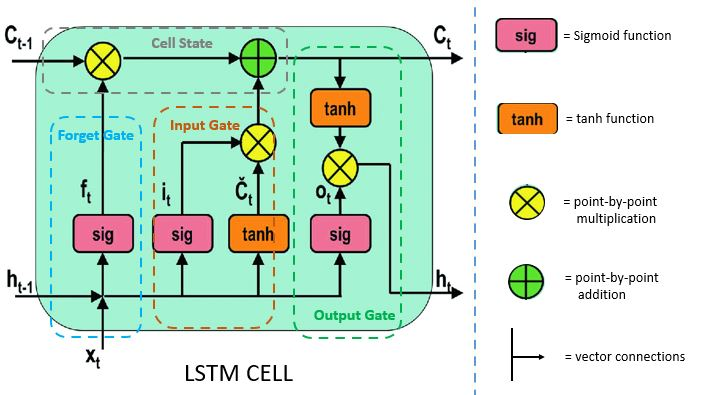

In [ ]:
from IPython.display import Image
Image('https://pluralsight2.imgix.net/guides/8a8ac7c1-8bac-4e89-ace8-9e28813ab635_3.JPG', width=600, height=300)

**Cell State:** The cell state acts as the memory of the LSTM. It allows information to flow through the network without much modification, helping to maintain long-term dependencies.

## How LSTMs Work?
Let's understand the flow of information through an LSTM unit:
* **Step 1: Input Gate**
The input gate determines the importance of the current input. It combines the previous hidden state and the current input, and the resulting value ranges between 0 and 1.

* **Step 2: Forget Gate**
The forget gate decides what information should be discarded from the cell state. The output ranges between 0 and 1, where 0 means "completely forget" and 1 means "completely remember."

* **Step 3: Updating the Cell State**
The cell state is updated by combining the input from the input gate and the forget gate.

* **Step 4: Output Gate**
The output gate determines the next hidden state and the output.

### Forward Prpagation

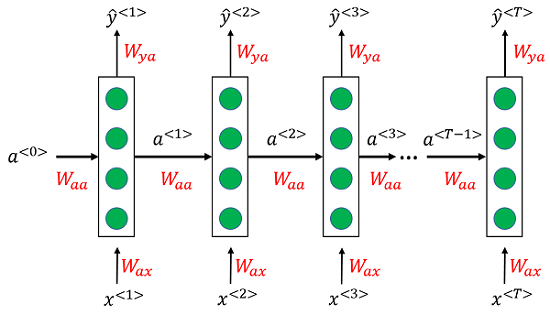

In [ ]:
Image('https://img-blog.csdnimg.cn/2018121014194065.png', width=600, height=300)

### Back Propagation

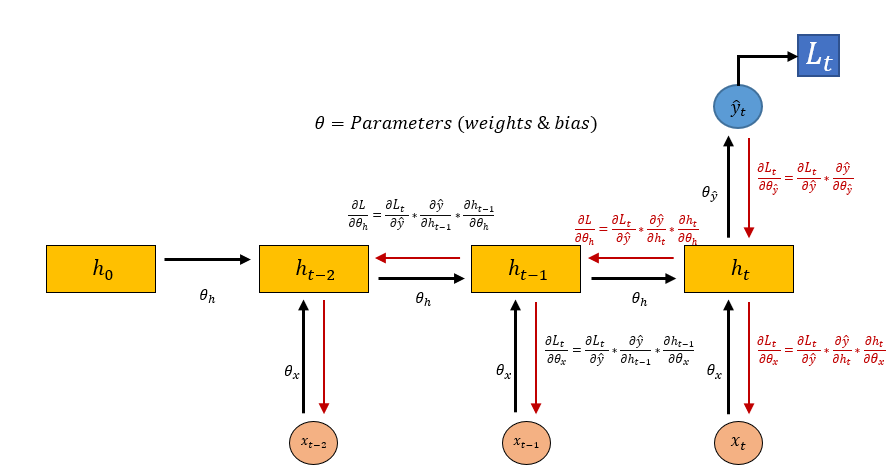

In [ ]:
Image('https://i.stack.imgur.com/S4C1U.png', width=800, height=400)

### Model Building

In [ ]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(10, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(15))
model.add(Dense(15))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
#Model's Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 10)            480       
                                                                 
 dropout (Dropout)           (None, 40, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15)                1560      
                                                                 
 dense (Dense)               (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 248)               3968      
                                                                 
Total params: 6,248
Trainable params: 6,248
Non-trainabl

In [ ]:
#Training the Model
history = model.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
219/219 [==============================] - 12s 12ms/step - loss: 4.7565
Epoch 2/5
219/219 [==============================] - 3s 12ms/step - loss: 4.6132
Epoch 3/5
219/219 [==============================] - 2s 9ms/step - loss: 4.5740
Epoch 4/5
219/219 [==============================] - 2s 10ms/step - loss: 4.5589
Epoch 5/5
219/219 [==============================] - 2s 8ms/step - loss: 4.5436


[Text(0.5, 0, 'Epochs')]

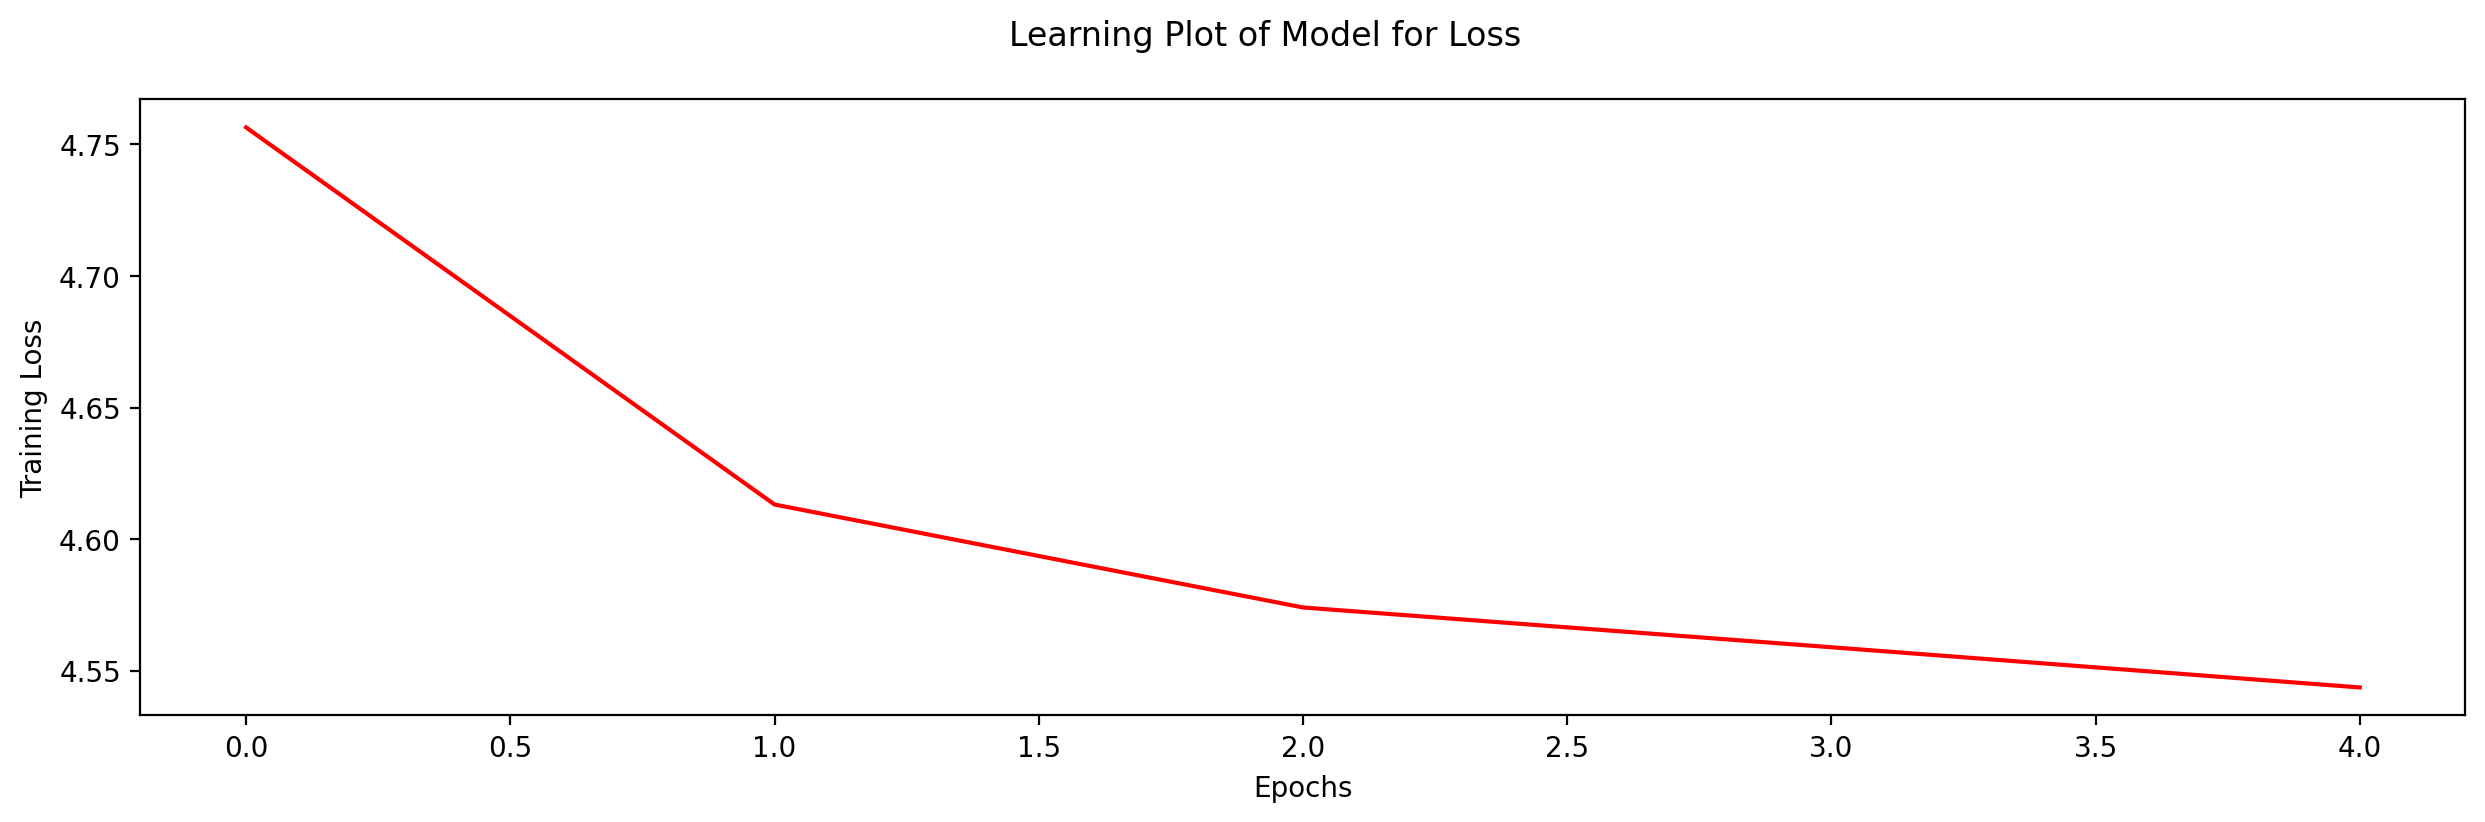

In [ ]:
#Plotting the learnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4))
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="red")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [ ]:
#@title
def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = []
            for j in chord_notes:
                inst_note=int(j)
                note_snip = note.Note(inst_note)
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else:
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)
    return Melody_midi

In [ ]:
#@title
def Malody_Generator(model, Note_Count):
    seed = X_test[np.random.randint(0,len(X_test)-1)]
    Music = ""
    Notes_Generated=[]
    for i in range(Note_Count):
        seed = seed.reshape(1,length,1)
        prediction = model.predict(seed, verbose=0)[0]
        prediction = np.log(prediction) / 1.0 #diversity
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        index = np.argmax(prediction)
        index_N = index/ float(L_symb)
        Notes_Generated.append(index)
        Music = [reverse_mapping[char] for char in Notes_Generated]
        seed = np.insert(seed[0],len(seed[0]),index_N)
        seed = seed[1:]
    #Now, we have music in form or a list of chords and notes and we want to be a midi file.
    Melody = chords_n_notes(Music)
    Melody_midi = stream.Stream(Melody)
    return Music,Melody_midi


#getting the Notes and Melody created by the model
Music_notes, Melody = Malody_Generator(model=model, Note_Count=10)

In [ ]:
print(Music_notes)

['D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4']


In [ ]:
type(Melody)

music21.stream.base.Stream

In [ ]:
# Convert the melody to a MIDI file
midi_file = "prediction/simple_output.mid"
Melody.write("midi", midi_file)

'prediction/simple_output.mid'

In [ ]:
IPython.display.Audio("prediction/simple_output.mid")

# Limitations of LSTM

* LSTM cannot solve the long term dependency problem for a sequence of long length.
* The working and internal architecture of LSTM is somewhat complex because with the increase in no. of gates, the parameters also increases and hence the convergence time and computation power are required in excess amount.
* LSTM cannot store information in indexed fashion like a list or any structured data.

# Bidirectional LSTM

Bidirectional LSTM can be thought of as two LSTM recurrent networks working in parallel where one network takes information forward in time while another takes inputs backward.


Bidirectional LSTM (BiLSTM) is an extension of the standard LSTM architecture that incorporates information from both past and future context in sequence data. While a regular LSTM processes input sequentially from one direction (typically from past to future), a BiLSTM processes input in both directions simultaneously.

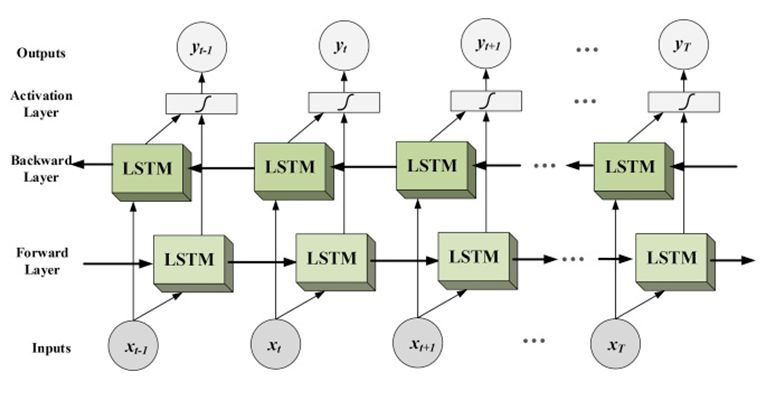

In [ ]:
Image('https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/05/Deep-Dive-into-Bidirectional-LSTM-i2tutorials.jpg', width=600, height=300)

## How a Bidirectional LSTM works?

1. **Forward LSTM**
The input sequence is processed by a forward LSTM, which operates on the input data in the regular sequential manner.

2. **Backward LSTM**
Simultaneously, the input sequence is processed by a backward LSTM. Here, the input sequence is reversed, and the backward LSTM processes the reversed sequence in a similar manner to the forward LSTM.

3. **Concatenation**
After both the forward and backward LSTMs have processed the entire sequence, the outputs from both LSTMs at each time step are concatenated to form the final output.

### The key advantages
* **Enhanced Contextual Understanding**
By considering information from both past and future contexts, a BiLSTM can capture more comprehensive dependencies in the sequence.

* **Improved Performance**
Bidirectional LSTMs often yield better performance compared to unidirectional LSTMs in tasks such as sequence labeling, speech recognition, and natural language processing. The model can leverage the additional contextual information to make more accurate predictions and better capture long-range dependencies.

In [ ]:
from keras.layers import Bidirectional, TimeDistributed, Flatten

In [ ]:
bidirectiona_model = Sequential()
bidirectiona_model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=(X.shape[1], X.shape[2])))
bidirectiona_model.add(Bidirectional(LSTM(10)))
bidirectiona_model.add(Dense(y.shape[1], activation="softmax"))
bidirectiona_model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [ ]:
#Model's Summary
bidirectiona_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 40, 20)           960       
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               2480      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 248)               5208      
                                                                 
Total params: 8,648
Trainable params: 8,648
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training the Bidirectional Model
bidirectional_history = bidirectiona_model.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
219/219 [==============================] - 11s 12ms/step - loss: 4.9159
Epoch 2/5
219/219 [==============================] - 3s 12ms/step - loss: 4.6751
Epoch 3/5
219/219 [==============================] - 3s 12ms/step - loss: 4.6668
Epoch 4/5
219/219 [==============================] - 3s 14ms/step - loss: 4.6437
Epoch 5/5
219/219 [==============================] - 3s 13ms/step - loss: 4.6105


[Text(0.5, 0, 'Epochs')]

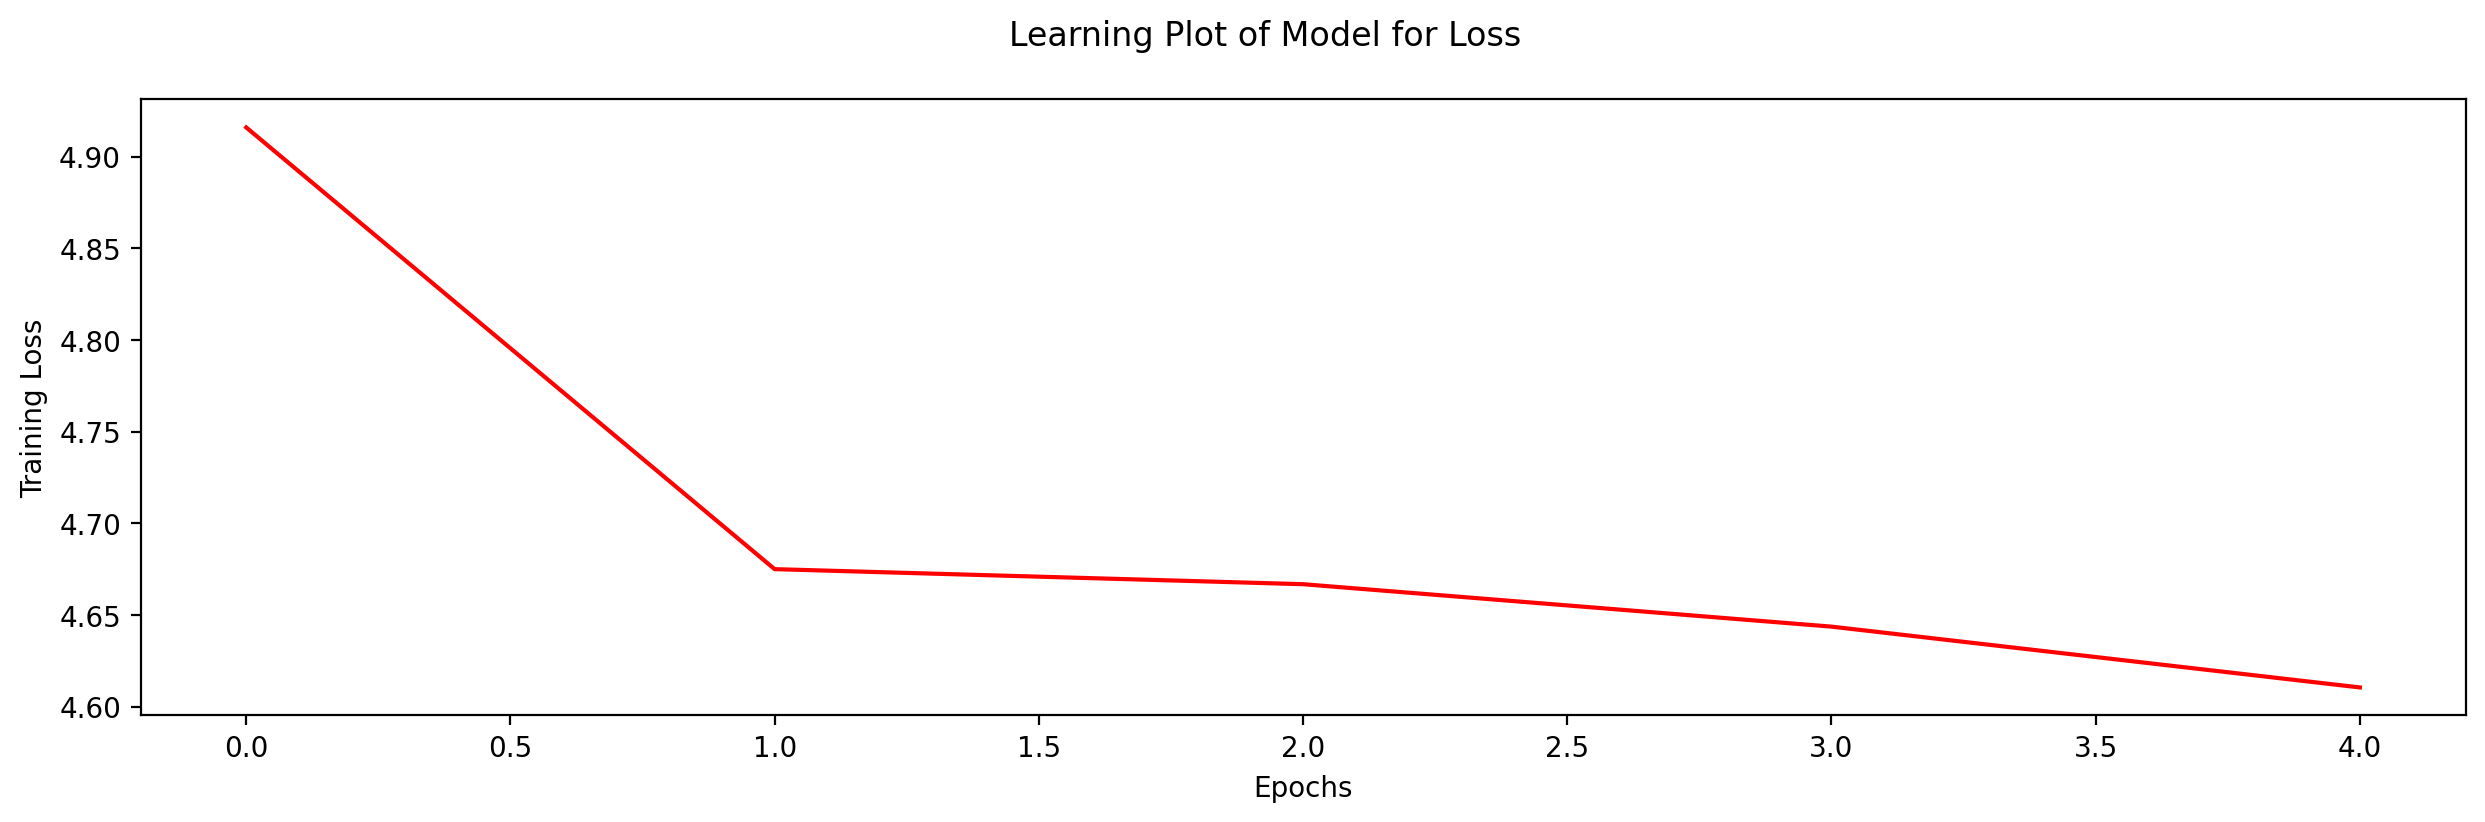

In [ ]:
#Plotting the learnings of Bidirectiona model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bidirectional_history_df = pd.DataFrame(bidirectional_history.history)
fig = plt.figure(figsize=(15,4))
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=bidirectional_history_df["loss"],color="red")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [ ]:
#getting the Notes and Melody created by the model
bidirectional_Music_notes, bidirectional_Melody = Malody_Generator(model=bidirectiona_model, Note_Count=10)

In [ ]:
print(Music_notes)

['D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4']


In [ ]:
# Convert the melody to a MIDI file
midi_file = "prediction/bidirectional_output.mid"
Melody.write("midi", midi_file)

'prediction/bidirectional_output.mid'

In [ ]:
IPython.display.Audio("prediction/bidirectional_output.mid")

### Disadvantages

* **Increased Computational Complexity**
Using a Bidirectional LSTM doubles the number of computations compared to a unidirectional LSTM, as both the forward and backward LSTMs need to be processed simultaneously.

* **Delayed Predictions**
Since the backward LSTM processes the sequence in reverse, predictions for the future time steps are based on future context information.

# CNN + LSTM

Combining Convolutional Neural Networks (CNNs) with Long Short-Term Memory (LSTM) networks is a powerful approach for handling sequential data that has both spatial and temporal dependencies.



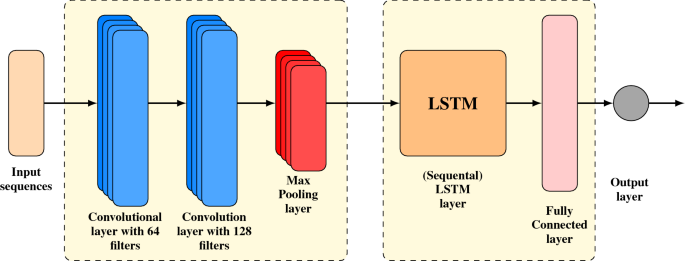

In [ ]:
Image('https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs00521-020-04867-x/MediaObjects/521_2020_4867_Fig2_HTML.png', width=600, height=300)

## How the CNN-LSTM architecture works?

1. **CNN for Spatial Feature Extraction**
The input sequence, which could be in the form of images, videos, or any other sequential data, is first processed by a CNN. The CNN is designed to extract relevant spatial features from the input at different levels of abstraction.

2. **Sequence Preparation**
After passing the input sequence through the CNN, the output  then reshaped or flattened to convert the spatial information into a sequence format that can be fed into an LSTM.

3. **LSTM for Temporal Modeling**
The reshaped feature maps from the CNN are now passed to the LSTM network. The LSTM learns to model the temporal dependencies within the sequence by maintaining an internal memory state and using input, forget, and output gates to control the flow of information.

4. **Output and Prediction**
The output from the LSTM can be further processed through additional layers such as fully connected layers or softmax layers, depending on the specific task.

### Advantages of combining CNNs and LSTMs include

* **Feature Extraction**
CNNs excel at extracting  features from data such as images, enabling the model to learn relevant patterns and structures.

* **Temporal Modeling**
LSTMs are adept at modeling temporal dependencies and capturing long-range dependencies in sequential data.

* **Hierarchical Learning**
The CNN-LSTM architecture allows for hierarchical learning, where the CNN focuses on extracting spatial features and the LSTM focuses on capturing temporal dependencies. This hierarchical approach enables the model to learn and reason about both local and global patterns in the input sequence.

### Application Areas

* Image Search tools
* Guidance Device
* Self driving cars

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Embedding

In [ ]:
# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

In [ ]:
print('Build model...')

cnnlstm_model = Sequential()
cnnlstm_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
cnnlstm_model.add(MaxPooling1D(pool_size=2))
cnnlstm_model.add(Flatten())
cnnlstm_model.add(Dense(50, activation='relu'))
cnnlstm_model.add(Dense(y.shape[1], activation="softmax"))
opt = Adamax(learning_rate=0.01)
cnnlstm_model.compile(loss='mse', optimizer=opt)

Build model...


In [ ]:
#Training the CNN + LSTM  Model
cnnlstm_hsitory = cnnlstm_model.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
219/219 [==============================] - 6s 4ms/step - loss: 0.0040
Epoch 2/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0039


[Text(0.5, 0, 'Epochs')]

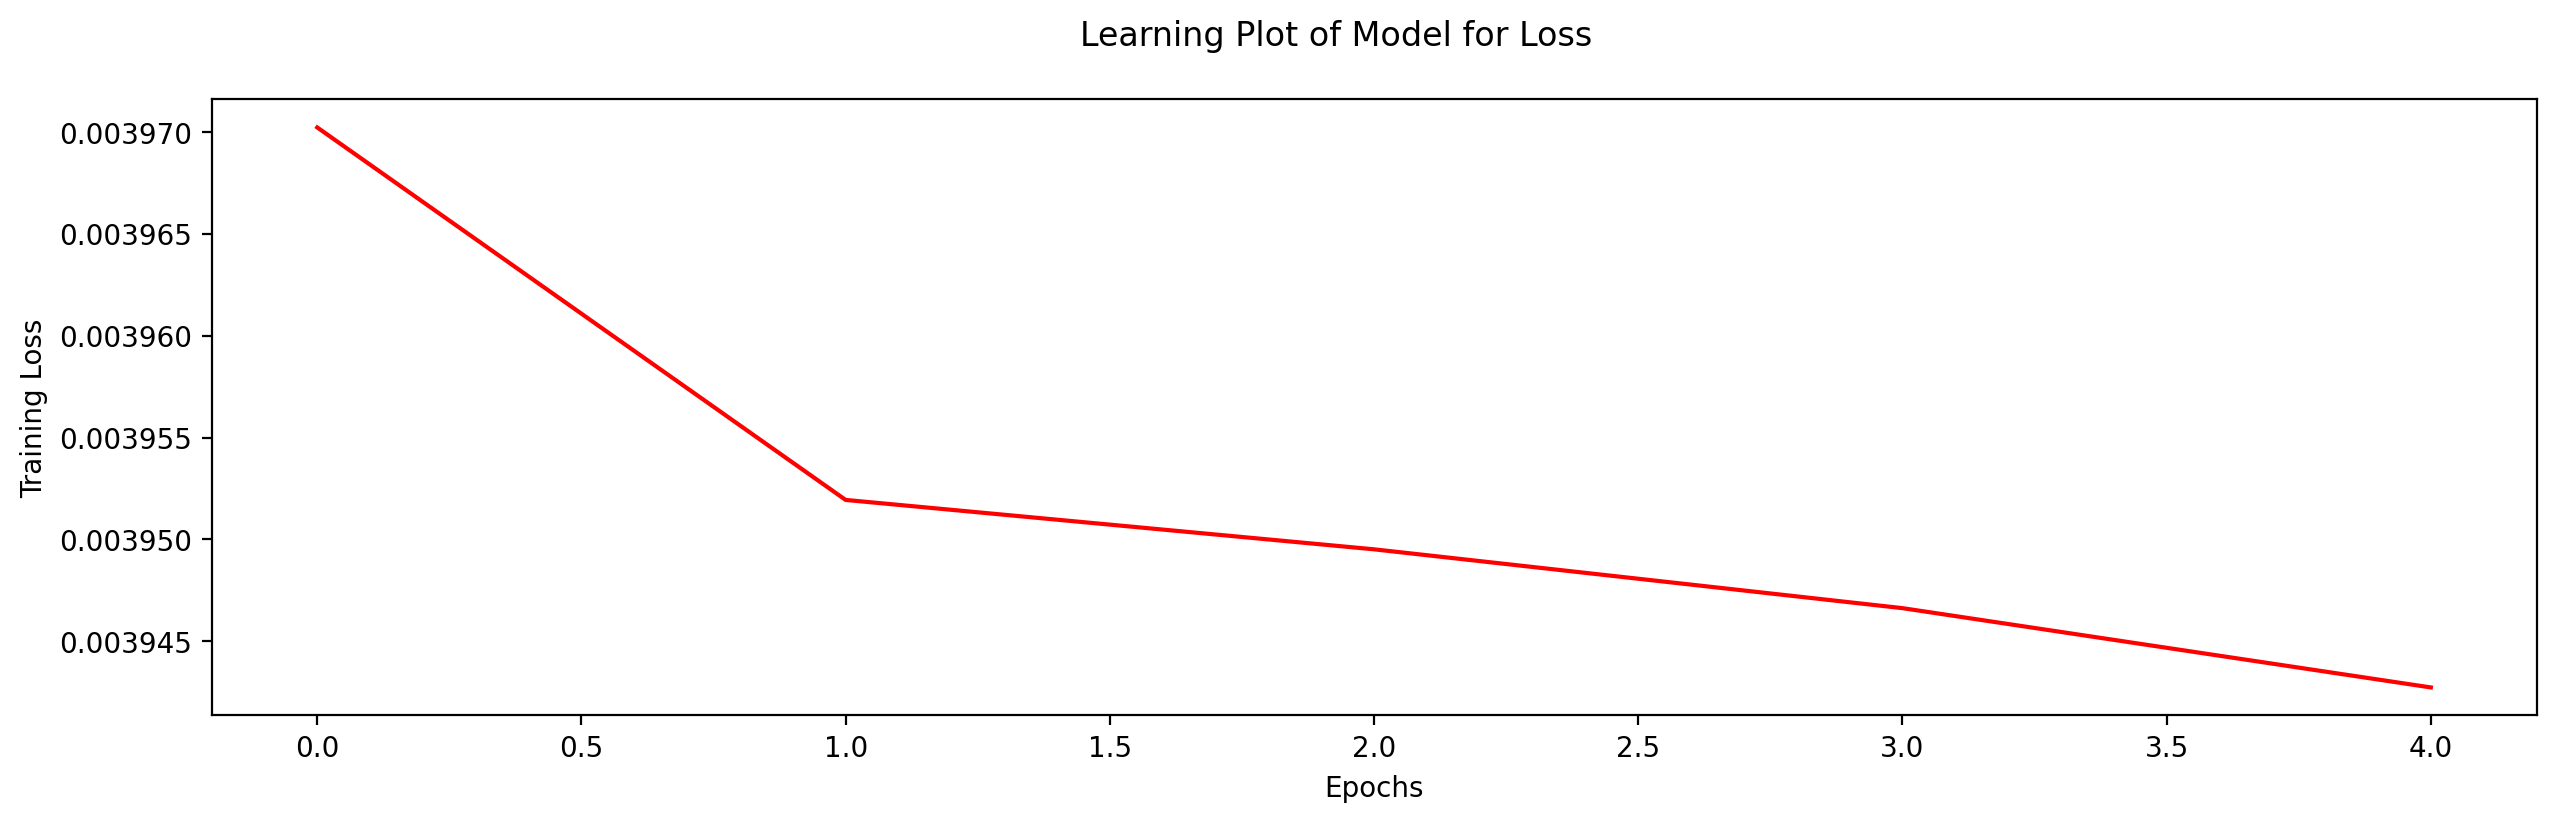

In [ ]:
#Plotting the learnings of CNN + LSTM  model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cnnlstm_history_df = pd.DataFrame(cnnlstm_hsitory.history)
fig = plt.figure(figsize=(15,4))
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=cnnlstm_history_df["loss"],color="red")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [ ]:
#getting the Notes and Melody created by the model
cnnlstm_Music_notes, cnnlstm_Melody = Malody_Generator(model=cnnlstm_model, Note_Count=10)

In [ ]:
print(cnnlstm_Music_notes)

['D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'E-4', 'D4', 'D4']


In [ ]:
# Convert the melody to a MIDI file
midi_file = "prediction/cnnlstm_output.mid"
Melody.write("midi", midi_file)

'prediction/cnnlstm_output.mid'

In [ ]:
IPython.display.Audio("prediction/cnnlstm_output.mid")

### Disadvantages

1. **Computational Complexity**
2. **Longer Training Time**
3. **Hyperparameter Tuning**
4. **Lack of Interpretability**
5. **Overfitting**
6. **Difficulty in Model Optimization**

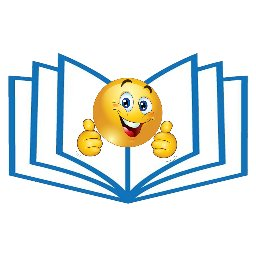

In [ ]:
Image('https://pbs.twimg.com/profile_images/729657220841938944/t5PLT2w__400x400.jpg', width=600, height=300)